# Rol de las Capas Ocultas de una ANN
## (a) Creación de conjunto de pruebas

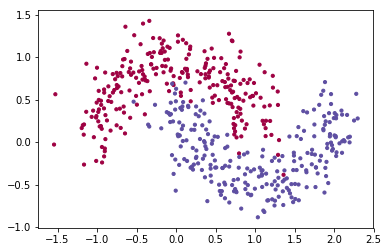

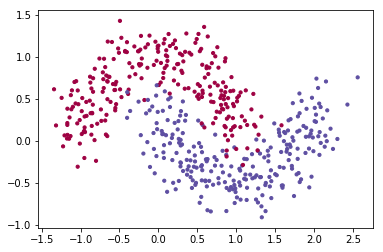

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

x_batch, y_batch = make_moons(500, noise=0.50)
x_test, y_test = make_moons(500, noise=0.50)
plt.scatter(x_batch[:,0], x_batch[:,1], s=10, c=y_batch, cmap=plt.cm.Spectral)
plt.show()
plt.scatter(x_test[:,0], x_test[:,1], s=10, c=y_test, cmap=plt.cm.Spectral)
plt.show()

## (b) Resolución por una neurona

In [85]:
model = Sequential()
model.add(Dense(units=1, input_dim=2, activation = 'sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(x_batch, y_batch, epochs=10, batch_size=500)
print (model.evaluate(x_test, y_test, batch_size=500))

Epoch 1/10
500/500 [==============================] - 1s - loss: 0.9788 - acc: 0.3260
Epoch 2/10
500/500 [==============================] - 0s - loss: 0.9783 - acc: 0.3260
Epoch 3/10
500/500 [==============================] - 0s - loss: 0.9776 - acc: 0.3260
Epoch 4/10
500/500 [==============================] - 0s - loss: 0.9769 - acc: 0.3260
Epoch 5/10
500/500 [==============================] - 0s - loss: 0.9761 - acc: 0.3280
Epoch 6/10
500/500 [==============================] - 0s - loss: 0.9753 - acc: 0.3280
Epoch 7/10
500/500 [==============================] - 0s - loss: 0.9746 - acc: 0.3280
Epoch 8/10
500/500 [==============================] - 0s - loss: 0.9738 - acc: 0.3280
Epoch 9/10
500/500 [==============================] - 0s - loss: 0.9731 - acc: 0.3300
Epoch 10/10
500/500 [==============================] - 1s
[0.9730989933013916, 0.33000001311302185]


A partir del resultado anterior se puede observar que la exactitud de clasificación es bastante inestable, es decir, que de una instanciación a otra el nivel de exactitud testeado varía en un rango entre 10% y 80%. Si bien puede llegar a un nivel alto, las probabilidades de falla son altas

## (c) Resolución por perceptron multicapa

In [93]:
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(250, activation='softmax'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_batch, y_batch, epochs=10, batch_size=500)
print (model.evaluate(x_test, y_test, batch_size=500))

Epoch 1/10
500/500 [==============================] - 1s - loss: 0.6931 - acc: 0.5000
Epoch 2/10
500/500 [==============================] - 0s - loss: 0.6929 - acc: 0.7500
Epoch 3/10
500/500 [==============================] - 0s - loss: 0.6925 - acc: 0.5040
Epoch 4/10
500/500 [==============================] - 0s - loss: 0.6922 - acc: 0.7480
Epoch 5/10
500/500 [==============================] - 0s - loss: 0.6918 - acc: 0.7760
Epoch 6/10
500/500 [==============================] - 0s - loss: 0.6913 - acc: 0.7840
Epoch 7/10
500/500 [==============================] - 0s - loss: 0.6908 - acc: 0.7900
Epoch 8/10
500/500 [==============================] - 0s - loss: 0.6902 - acc: 0.7680
Epoch 9/10
500/500 [==============================] - 0s - loss: 0.6896 - acc: 0.7820
Epoch 10/10
500/500 [==============================] - 1s
[0.68796837329864502, 0.7839999794960022]


En este caso, el nivel de exactitud se estabilizó alrededor del 80%. De esta forma, se puede ver que la cantidad de capas mejoró la predicción, resolviendo en general de mejor forma el problema de clasificación de los puntos.

# Back-propagation (BP) from Scratch
## (a)